In [1]:
###Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
###Importing Data from a CSV File to a DataFrame

df = pd.read_csv('salary_data.csv')
df=df.sample(frac=1)
df.index=(range(len(df)))
df.head()

,YearsExperience,Salary
0,5.9,81363
1,5.3,83088
2,6.8,91738
3,8.7,109431
4,3.0,60150


In [3]:
###Converting data into Arrays using Numpy

##Splitting the Data into X and Y DataFrames
X = np.array(df['YearsExperience'])
y = np.array(df['Salary'])

print("X")
print("")
print(X)
print("")
print("")
print("Y")
print(y)

X

[ 5.9  5.3  6.8  8.7  3.   1.1  3.7  4.1  6.   9.6  3.9  7.1  9.5  1.5
  2.2  3.2  4.9  8.2 10.5  4.   4.   2.9  5.1 10.3  3.2  4.5  7.9  1.3
  2.   9. ]


Y
[ 81363  83088  91738 109431  60150  39343  57189  57081  93940 112635
  63218  98273 116969  37731  39891  64445  67938 113812 121872  56957
  55794  56642  66029 122391  54445  61111 101302  46205  43525 105582]


In [4]:
X=X.reshape(30,1)
y=y.reshape(30,1)
print(X.shape)
print(y.shape)

(30, 1)
(30, 1)


In [5]:
###Making Data suitable for Linear Regression
m=X.shape[0]
print("m:",m)
##Padding X array with ones for the bias term
o = np.ones((m,1))
X = np.hstack((o,X))
print(X.shape)
print("")
print(X[:5,:])

m: 30
(30, 2)

[[1.  5.9]
 [1.  5.3]
 [1.  6.8]
 [1.  8.7]
 [1.  3. ]]


In [6]:
def FeatureNormalization(x):
    x = x[:,1:]
    m = x.shape[0]
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    x_norm = (x-mean)/std
    o = np.ones((m,1))
    x_norm = np.hstack((o,x_norm))
    return x_norm,mean,std

In [7]:
##Normalizing the array
X_norm,mean,std = FeatureNormalization(X)
X_norm[:5,:]

array([[ 1.        ,  0.21026054],
       [ 1.        , -0.00477865],
       [ 1.        ,  0.53281931],
       [ 1.        ,  1.21377673],
       [ 1.        , -0.82909552]])

In [8]:
n=int((0.8)*len(X))
X_train=X[:n]
X_test=X[n:]
y_train=y[:n]
y_test=y[n:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 2)
(24, 1)
(6, 2)
(6, 1)


In [9]:
#Initializing the Parameters
def InitialParameters(x):
    n = x.shape[1]
    theta = np.zeros((n,1))
    return theta
#InitialParameters(X_train).shape

In [10]:
##Cost Function 

def CostFunction(x,y,theta):
    ### Start code here
    h = np.dot(x,theta)
    m = float(x.shape[0])
    J = np.sum((1/(2*m))*(h-y)**2)
    return J,h
#CostFunction(X_train,Y_train,theta)

In [11]:
#Gradient Descent
def UpdateParameters(x,y,theta,h,alpha):
    ### Start code here
    m = float(x.shape[0])
    theta =theta-((alpha/m)*(np.dot(x.T,(h-y))))
    ### End code here
    return theta
#UpdateParameters(X_train,Y_train,theta,h,0.01)

In [45]:
##Training the model

alpha = 0.01
itr = 100000

theta = InitialParameters(X_train)
#print(theta.shape)
J_history = []
I_history = []

for i in range(itr):
    J,h = CostFunction(X_train,y_train,theta) # Call cost funtion
    J_history.append(J)
    #d_theta = GradDescent(X_train,Y_train,theta,h) # Call gradient Descent
    #theta = theta-(alpha*np.sum(d_theta)) # Update parameters
    theta=UpdateParameters(X_train,y_train,theta,h,alpha)
    I_history.append(i)

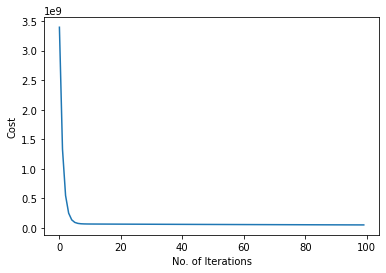

In [46]:
J_history = np.array(J_history)
J_history = J_history.reshape((itr,1))
J_history.shape

I_history = np.array(I_history)
I_history = I_history.reshape((itr,1))
I_history.shape
plt.ylabel("Cost")
plt.xlabel("No. of Iterations")
plt.plot(I_history[:100],J_history[:100])
plt.show()

In [47]:
theta

array([[24968.30540536],
       [ 9647.76175111]])

In [48]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100

In [49]:
#Testing Set

Y_test_predict= np.dot(X_test,theta)
mse_test = np.square(np.subtract(y_test,Y_test_predict)).mean()
print("MAPE:",mape(y_test,Y_test_predict))

MAPE: 6.830282289162726


In [50]:
y_test

array([[ 54445],
       [ 61111],
       [101302],
       [ 46205],
       [ 43525],
       [105582]], dtype=int64)

In [51]:
Y_test_predict

array([[ 55841.14300892],
       [ 68383.23328537],
       [101185.62323915],
       [ 37510.39568181],
       [ 44263.82890759],
       [111798.16116538]])